In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy.interpolate import *
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
FFS = "fantasystatsall.csv"
FFP = 'Scoring_System_ESPN_Classic.csv'
FFSPG= "FantasyStatsByGame\MostStatsPerGame.csv"
# Read the Mouse and Drug Data and the Clinical Trial Data
FFS_df = pd.read_csv(FFS)
FFP_df = pd.read_csv(FFP)
FFSPG_df = pd.read_csv(FFSPG)

# Combine the data into a single dataset
# data_combine = pd.merge(mouse_data,clinical_data, how='left', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
FFS_df=FFS_df.fillna(0)
FFSPG_df=FFSPG_df.fillna(0)
FFSPG_df.head()


,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Interceptions PG,Passing Redzone Attempts PG,Passing Touchdowns PG,Passing Yards PG,Field Goal Attempts PG,Field Goal Longest,Field Goal Made PG,Field Goal Yards PG,Extra Pts Attempts PG,Extra Pts Made PG
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,0.000000,...,1.000000,0.312500,1.500000,212.500000,0.0,0.0,0.0,0.0,0.0,0.0
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,0.090909,...,1.090909,3.727273,1.272727,223.090909,0.0,0.0,0.0,0.0,0.0,0.0
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,0.000000,...,0.666667,3.166667,1.416667,206.916667,0.0,0.0,0.0,0.0,0.0,0.0
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,0.000000,...,0.937500,4.500000,1.937500,244.062500,0.0,0.0,0.0,0.0,0.0,0.0
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,0.000000,...,1.214286,1.928571,0.857143,193.571429,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#better way
FP_Calc_DF2 = FFSPG_df

act_list = FFP_df["Activity"].tolist()
pts_list = FFP_df["Points"].tolist()


for i in range (len(act_list)):
   try:
       x = FP_Calc_DF2[act_list[i] + " PG"] * pts_list[i]
       FP_Calc_DF2[act_list[i] + " FP"] = x
   except:
       print(act_list[i] + " not a column in FP_Calc_DF2")


FP_Calc_DF2.head()

2pt Pass Conversions not a column in FP_Calc_DF2
2pt Rush Conversions not a column in FP_Calc_DF2
2pt Receiving Conversions not a column in FP_Calc_DF2
PAT not a column in FP_Calc_DF2
Field Goals Missed not a column in FP_Calc_DF2
FG Made (0-39 yards) not a column in FP_Calc_DF2
FG Made (40-49 yards) not a column in FP_Calc_DF2
FG Made (50+ yards)  not a column in FP_Calc_DF2
Kickoff Return TD not a column in FP_Calc_DF2
Punt return TD not a column in FP_Calc_DF2
Interception Return TD not a column in FP_Calc_DF2
Fumble Return TD not a column in FP_Calc_DF2
Blocked Punt Return TD not a column in FP_Calc_DF2
Blocked FG Return TD not a column in FP_Calc_DF2
2pt Return not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
Sack not a column in FP_Calc_DF2
Blocked Punt, PAT, FG not a column in FP_Calc_DF2
Interception not a column in FP_Calc_DF2
Fumble Recovered not a column in FP_Calc_DF2
Safety not a column in FP_Calc_DF2
0 points allowed (PA0) not a column in FP_Calc_DF2
1-6 poi

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Extra Pts Made PG,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,0.000000,...,0.0,8.500000,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,0.090909,...,0.0,8.923636,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,0.000000,...,0.0,8.276667,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,0.000000,...,0.0,9.762500,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,0.000000,...,0.0,7.742857,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857


In [3]:
#Calc Fantasy Points
FFSPG_df['Total FP PG']= FFSPG_df['Passing Yards FP']+FFSPG_df['Passing Touchdowns FP'] \
                       +FFSPG_df['Passing Interceptions FP']+FFSPG_df['Rush Yards FP'] \
                        +FFSPG_df['Rush Touchdowns FP']+FP_Calc_DF2['Rec Yards FP']+FP_Calc_DF2['Rec Receptions FP']\
                        +FFSPG_df['Rec Touchdowns FP']+FP_Calc_DF2['Lost Fumbles FP']
FFSPG_df.head()

,Key,Player Name,Player Team,Season,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,...,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG
0,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,2012,QB,16,16,30,0.000000,0.000000,...,8.500000,6.000000,-2.000000,1.231250,0.375000,0.0,0.000000,0.0,-0.750000,13.356250
1,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2013 d26a...,Ryan Fitzpatrick,Titans,2013,QB,11,9,31,0.090909,0.090909,...,8.923636,5.090909,-2.181818,2.045455,1.636364,0.0,0.090909,0.0,-0.363636,15.241818
2,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2014 82d2...,Ryan Fitzpatrick,Texans,2014,QB,12,12,32,0.000000,0.000000,...,8.276667,5.666667,-1.333333,1.533333,1.000000,0.0,0.000000,0.0,-0.166667,14.976667
3,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,2015,QB,16,16,33,0.000000,0.000000,...,9.762500,7.750000,-1.875000,1.687500,0.750000,0.0,0.000000,0.0,-0.250000,17.825000
4,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,2016,QB,14,11,34,0.000000,0.000000,...,7.742857,3.428571,-2.428571,0.928571,0.000000,0.0,0.000000,0.0,-0.142857,9.528571


In [4]:
#convert Passing Completion to decimal format 
#remove any player who did not play more than 13 games 
#Set season as INDEX
FFSPG_df['Passing_Completion_Pct_adj']=FFSPG_df['Passing Completion Pct']/100
FFSPG_df= FFSPG_df[FFSPG_df['Games Played'] >= 13]
FFSPG_df.set_index("Season", inplace = True) 
FFSPG_df.head()

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.0000,0.0000,0.00,...,6.000000,-2.000000,1.231250,0.375,0.00000,0.0000,0.0,-0.750000,13.356250,0.60594
2015,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.0000,0.0000,0.00,...,7.750000,-1.875000,1.687500,0.750,0.00000,0.0000,0.0,-0.250000,17.825000,0.59609
2016,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.0000,0.0000,0.00,...,3.428571,-2.428571,0.928571,0.000,0.00000,0.0000,0.0,-0.142857,9.528571,0.56576
2013,8fc65820-f565-44e2-8635-3e1cdf165bf6 2013 768c...,Chris Hogan,Bills,WR,16,0,26,0.0000,0.6250,0.00,...,0.000000,-0.000000,0.000000,0.000,0.51875,0.6250,0.0,-0.000000,1.143750,0.00000
2014,8fc65820-f565-44e2-8635-3e1cdf165bf6 2014 768c...,Chris Hogan,Bills,WR,16,2,27,0.5625,2.5625,0.25,...,0.000000,-0.000000,0.000000,0.000,2.66250,2.5625,1.5,-0.250000,6.475000,0.00000


In [ ]:
FP_Calc_DF2.to_csv(r'fantasystatsall_NAN.csv')

In [5]:
#create unique Dataset for each position

# FP_Calc_DF3.set_index("Position", inplace=True)
Catch=['WR','TE']
FP_Calc_QB =FFSPG_df[FFSPG_df.Position == 'QB']
FP_Calc_RB =FFSPG_df[FFSPG_df.Position == 'RB']
FP_Calc_Catch =FFSPG_df[FFSPG_df.Position.isin(Catch)]
# surveys_df[surveys_df.year == 2002]
FP_Calc_Catch.head()

#FP_Calc_Catch.Position.unique()
#FP_Calc_DF3[FP_Calc_DF3.Position == 'QB']

,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2013,8fc65820-f565-44e2-8635-3e1cdf165bf6 2013 768c...,Chris Hogan,Bills,WR,16,0,26,0.000000,0.625000,0.000000,...,0.0,-0.0,0.000,0.0,0.518750,0.625000,0.000,-0.000000,1.143750,0.0
2014,8fc65820-f565-44e2-8635-3e1cdf165bf6 2014 768c...,Chris Hogan,Bills,WR,16,2,27,0.562500,2.562500,0.250000,...,0.0,-0.0,0.000,0.0,2.662500,2.562500,1.500,-0.250000,6.475000,0.0
2015,8fc65820-f565-44e2-8635-3e1cdf165bf6 2015 768c...,Chris Hogan,Bills,WR,16,4,28,0.312500,2.250000,0.125000,...,0.0,-0.0,0.025,0.0,2.812500,2.250000,0.750,-0.000000,5.847500,1.0
2016,8fc65820-f565-44e2-8635-3e1cdf165bf6 2016 9735...,Chris Hogan,Patriots,WR,15,14,29,0.333333,2.533333,0.266667,...,0.0,-0.0,0.060,0.0,4.533333,2.533333,1.600,-0.133333,8.593333,0.0
2018,8fc65820-f565-44e2-8635-3e1cdf165bf6 2018 9735...,Chris Hogan,Patriots,WR,16,7,31,0.187500,2.187500,0.187500,...,0.0,-0.0,0.000,0.0,3.325000,2.187500,1.125,-0.000000,6.637500,0.0


In [6]:
FFSPG_df.columns

Index(['Key', 'Player Name', 'Player Team', 'Position', 'Games Played',
       'Games Started', 'Season Age', 'Rec Red Zone Targets PG',
       'Rec Receptions PG', 'Rec Touchdowns PG', 'Rec Yards PG', 'Fumbles PG',
       'Lost Fumbles PG', 'Rush Attempts PG', 'Rush Avg Yards PG',
       'Rush Red Zone Attempts PG', 'Rush Scrambles PG', 'Rush Touchdowns PG',
       'Rush Yards PG', 'Passing Completion Pct', 'Passing Hurries PG',
       'Passing Interceptions PG', 'Passing Redzone Attempts PG',
       'Passing Touchdowns PG', 'Passing Yards PG', 'Field Goal Attempts PG',
       'Field Goal Longest', 'Field Goal Made PG', 'Field Goal Yards PG',
       'Extra Pts Attempts PG', 'Extra Pts Made PG', 'Passing Yards FP',
       'Passing Touchdowns FP', 'Passing Interceptions FP', 'Rush Yards FP',
       'Rush Touchdowns FP', 'Rec Yards FP', 'Rec Receptions FP',
       'Rec Touchdowns FP', 'Lost Fumbles FP', 'Total FP PG',
       'Passing_Completion_Pct_adj'],
      dtype='object')

In [7]:
FP_Calc_QB.head()


,Key,Player Name,Player Team,Position,Games Played,Games Started,Season Age,Rec Red Zone Targets PG,Rec Receptions PG,Rec Touchdowns PG,...,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP,Total FP PG,Passing_Completion_Pct_adj
Season,,,,,,,,,,,,,,,,,,,,,
2012,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2012 768c...,Ryan Fitzpatrick,Bills,QB,16,16,30,0.0,0.0,0.0,...,6.000000,-2.000000,1.231250,0.375,0.0,0.0,0.0,-0.750000,13.356250,0.60594
2015,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2015 5fee...,Ryan Fitzpatrick,Jets,QB,16,16,33,0.0,0.0,0.0,...,7.750000,-1.875000,1.687500,0.750,0.0,0.0,0.0,-0.250000,17.825000,0.59609
2016,0742d2ea-1cf2-49a6-a150-77ba6e034d8c 2016 5fee...,Ryan Fitzpatrick,Jets,QB,14,11,34,0.0,0.0,0.0,...,3.428571,-2.428571,0.928571,0.000,0.0,0.0,0.0,-0.142857,9.528571,0.56576
2012,5812204c-6dae-4450-8011-99e0f72864ac 2012 4809...,Ryan Tannehill,Dolphins,QB,16,16,24,0.0,0.0,0.0,...,3.000000,-1.625000,1.318750,0.750,0.0,0.0,0.0,-0.500000,11.178750,0.58264
2013,5812204c-6dae-4450-8011-99e0f72864ac 2013 4809...,Ryan Tannehill,Dolphins,QB,16,16,25,0.0,0.0,0.0,...,6.000000,-2.125000,1.487500,0.375,0.0,0.0,0.0,-0.625000,14.895000,0.60374


In [6]:
import seaborn as sns

In [7]:
FFSPG_df.columns

Index(['Key', 'Player Name', 'Player Team', 'Position', 'Games Played',
       'Games Started', 'Season Age', 'Rec Red Zone Targets PG',
       'Rec Receptions PG', 'Rec Touchdowns PG', 'Rec Yards PG', 'Fumbles PG',
       'Lost Fumbles PG', 'Rush Attempts PG', 'Rush Avg Yards PG',
       'Rush Red Zone Attempts PG', 'Rush Scrambles PG', 'Rush Touchdowns PG',
       'Rush Yards PG', 'Passing Completion Pct', 'Passing Hurries PG',
       'Passing Interceptions PG', 'Passing Redzone Attempts PG',
       'Passing Touchdowns PG', 'Passing Yards PG', 'Field Goal Attempts PG',
       'Field Goal Longest', 'Field Goal Made PG', 'Field Goal Yards PG',
       'Extra Pts Attempts PG', 'Extra Pts Made PG', 'Passing Yards FP',
       'Passing Touchdowns FP', 'Passing Interceptions FP', 'Rush Yards FP',
       'Rush Touchdowns FP', 'Rec Yards FP', 'Rec Receptions FP',
       'Rec Touchdowns FP', 'Lost Fumbles FP', 'Total FP PG',
       'Passing_Completion_Pct_adj'],
      dtype='object')

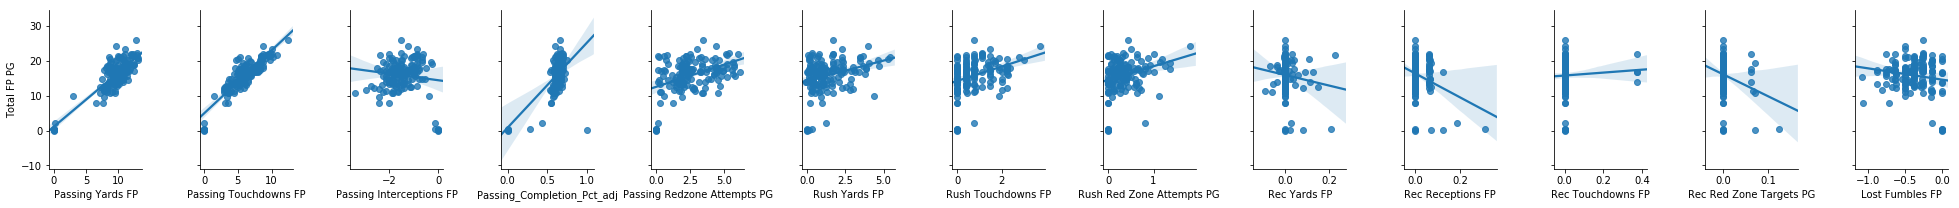

In [9]:
#QB Plot
sns.pairplot(FP_Calc_QB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )

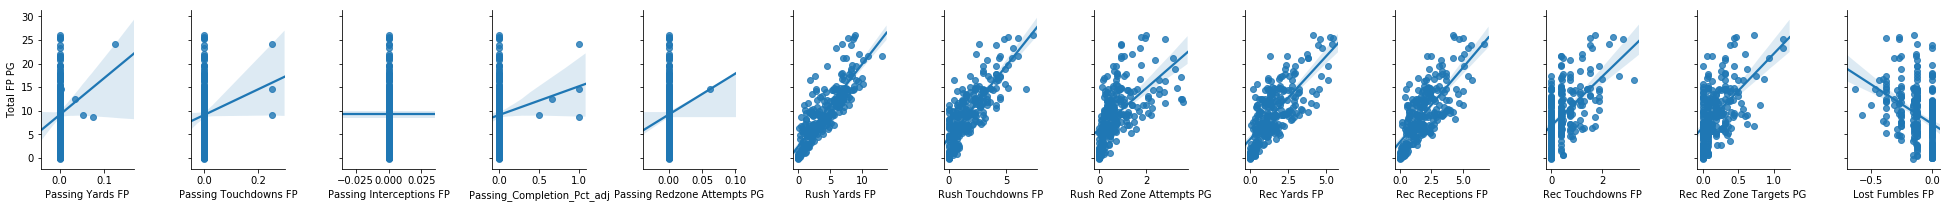

In [10]:
#QB Plot
sns.pairplot(FP_Calc_RB, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



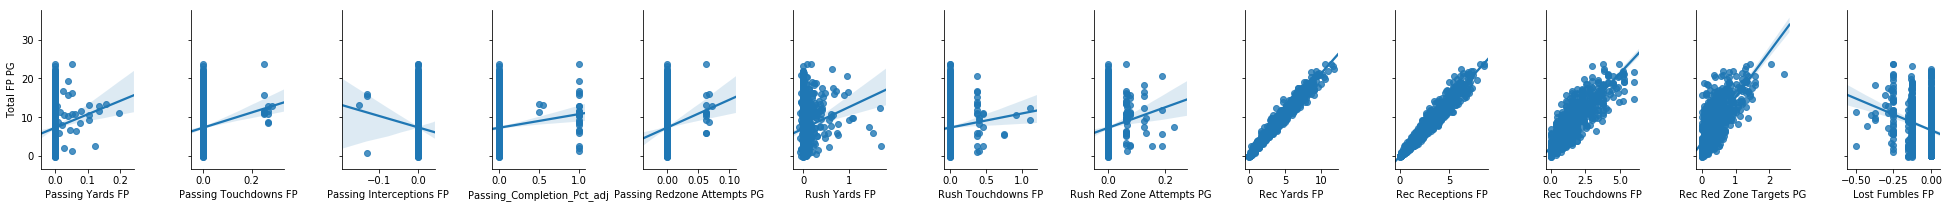

In [11]:
#QB Plot
sns.pairplot(FP_Calc_Catch, x_vars=['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Passing_Completion_Pct_adj','Passing Redzone Attempts PG',\
                                 'Rush Yards FP', 'Rush Touchdowns FP','Rush Red Zone Attempts PG',\
                                 'Rec Yards FP','Rec Receptions FP', 'Rec Touchdowns FP','Rec Red Zone Targets PG',\
                                 'Lost Fumbles FP'],\
                                 y_vars='Total FP PG', size=3, aspect =.7,kind='reg' )



In [14]:
# features_cols = [ 'Passing Completion Pct', 'Passing Hurries', 'Passing Interceptions',
#        'Passing Redzone Attempts', 'Passing Touchdowns', 'Passing Yards',, 'Rec Receptions', 'Rec Red Zone Targets',
#        'Rec Touchdowns', 'Rec Yards', 'Fumbles', 'Lost Fumbles',
#        'Rush Attempts', 'Rush Avg Yards', 'Rush Red Zone Attempts',
#        'Rush Scrambles', 'Rush Touchdowns', 'Rush Yards',]
#'Passing Completion Pct','Season Age'
#'Rec Yards FP'                 ,'Rec Receptions FP', 'Rec Touchdowns FP', 'Lost Fumbles FP'
# 'Rush Yards FP', 'Passing Completion Pct'
features_cols = ['Passing Yards FP', 'Passing Touchdowns FP', 'Passing Interceptions FP',\
                                 'Rush Yards FP', 'Rush Touchdowns FP',\
                                 'Rec Yards FP', 'Rec Receptions FP', 'Rec Touchdowns FP','Lost Fumbles FP']

In [15]:
x = FP_Calc_QB[features_cols]
x


,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Rush Yards FP,Rush Touchdowns FP,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
Season,,,,,,,,,
2012,8.500000,6.000000,-2.000000,1.231250,0.375000,0.000000,0.000000,0.000,-0.750000
2015,9.762500,7.750000,-1.875000,1.687500,0.750000,0.000000,0.000000,0.000,-0.250000
2016,7.742857,3.428571,-2.428571,0.928571,0.000000,0.000000,0.000000,0.000,-0.142857
2012,8.235000,3.000000,-1.625000,1.318750,0.750000,0.000000,0.000000,0.000,-0.500000
2013,9.782500,6.000000,-2.125000,1.487500,0.375000,0.000000,0.000000,0.000,-0.625000
2014,10.112500,6.750000,-1.500000,1.943750,0.375000,-0.025000,0.062500,0.000,-0.250000
2015,10.520000,6.000000,-1.500000,0.881250,0.375000,0.056250,0.062500,0.000,-0.375000
2016,9.215385,5.846154,-1.846154,1.261538,0.461538,0.000000,0.000000,0.000,-0.461538
2012,7.688000,3.466667,-2.400000,0.186667,0.000000,0.000000,0.000000,0.000,-1.066667


In [16]:
target_cols = ['Total FP PG']

In [17]:
y = FP_Calc_QB[target_cols]
y.head()

,Total FP PG
Season,
2012,13.356250
2015,17.825000
2016,9.528571
2012,11.178750
2013,14.895000


In [463]:
#FP_Calc_QB2.to_csv('Test.csv')

In [42]:
from sklearn.model_selection import train_test_split

In [18]:
x_train = x[x.index < 2018]
y_train = y[y.index < 2018]
x_test = x[x.index == 2018]
y_test = y[y.index == 2018]

In [50]:
print(x_train.shape),print(y_train.shape)

(129, 11)
(129, 1)


(None, None)

In [51]:
x_train.head()

,Passing Yards FP,Passing Touchdowns FP,Passing Interceptions FP,Passing Redzone Attempts PG,Rush Yards FP,Rush Touchdowns FP,Rush Red Zone Attempts PG,Rec Yards FP,Rec Receptions FP,Rec Touchdowns FP,Lost Fumbles FP
Season,,,,,,,,,,,
2012,8.500000,6.000000,-2.000000,0.312500,1.231250,0.375,0.000000,0.0,0.0,0.0,-0.750000
2015,9.762500,7.750000,-1.875000,4.500000,1.687500,0.750,0.562500,0.0,0.0,0.0,-0.250000
2016,7.742857,3.428571,-2.428571,1.928571,0.928571,0.000,0.071429,0.0,0.0,0.0,-0.142857
2012,8.235000,3.000000,-1.625000,0.312500,1.318750,0.750,0.000000,0.0,0.0,0.0,-0.500000
2013,9.782500,6.000000,-2.125000,4.000000,1.487500,0.375,0.312500,0.0,0.0,0.0,-0.625000


In [34]:
print(x_test.shape),print(y_test.shape)

(27, 9)
(27, 1)


(None, None)

In [19]:
x_train = add_constant(x_train)
est = sm.OLS(y_train,x_train.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total FP PG   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.191e+29
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:37:01   Log-Likelihood:                 3901.0
No. Observations:                 129   AIC:                            -7782.
Df Residuals:                     119   BIC:                            -7753.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      1.11e-15    8.1e-15      0.137      0.891   -1.49e-14    1.71e-14
Passing Yards FP             1.0000   1.35e-15   7.39e+14      0.000       1.000       1.000
Passing Touchdowns FP        1.0000   1.35e-15   7.39e+14      0.000       1.000       1.000
Passing Interceptions FP     1.0000   3.25e-15   3.08e+14      0.000       1.000       1.000
Rush Yards FP                1.0000   1.69e-15    5.9e+14      0.000       1.000       1.000
Rush Touchdowns FP           1.0000    2.6e-15   3.85e+14      0.000       1.000       1.000
Rec Yards FP                 1.0000    6.2e-14   1.61e+13      0.000       1.000       1.000
Rec Receptions FP            1.0000      6e-14   1.67e+13      0.000       1.000       1.000
Rec Touchdowns FP            1.0000   3.27e-14   3.06e+13      0.000       1.000       1.000
Lost Fumbles FP              1.0000   7.72e-15   1.29e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       22.315   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.687
Skew:                          -0.860   Prob(JB):                     4.84e-08
Kurtosis:                       4.819   Cond. No.                         555.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [577]:
FP_Calc_DF2.to_csv(r'Stats.csv')